**Experiment No. 2**

**Image Transformations for
Image Enhancement**

**Name- Shanti Pratapsinh Kashid.**

**PRN-2324000096**

**Div-B , Roll No.-73**

1. Image Negative

Theory

Image negative transformation enhances white or gray details in dark regions.

For an
8-bit grayscale image, the transformation is given by:

s = 255 − r

where r is the input pixel value and s is the output pixel value.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Replace 'path/to/your/image.jpg' with the actual path you copied
image_path = '/content/drive/MyDrive/IPCV/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not loaded. Check the file path.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


In [6]:
import cv2
import matplotlib.pyplot as plt

# 1. Load the image

# '0' reads the image in grayscale mode

img = cv2.imread(image_path, 0)


In [7]:
if img is None:
    print("Error: Image not found or could not be loaded. Please check the file path in 'image_path' variable.")
else:
    # 2. Apply the negative transformation

    # Since 'img' is a NumPy array, this applies to every pixel automatically

    negative_img = 255 - img

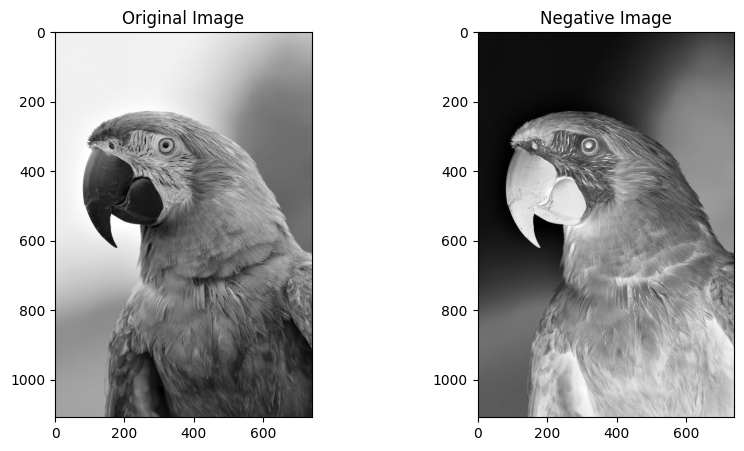

In [8]:
    # 3. Display the results

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Negative Image")
    plt.imshow(negative_img, cmap='gray')

    plt.show()

2. Contrast Stretching

Theory

Contrast stretching improves image visibility by expanding the range of intensity values.

s =
(r − rmin)/
(rmax − rmin)
× 255

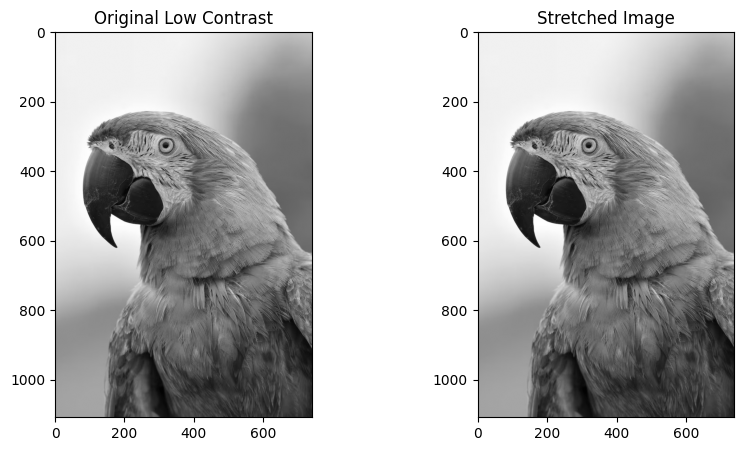

In [9]:
import cv2
import numpy as np
image_path = '/content/drive/MyDrive/IPCV/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg'
img = cv2.imread(image_path)
def contrast_stretch(image_path):
    # Load the image in grayscale

    img = cv2.imread(image_path, 0)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Image not found at {image_path}. Please check the file path.")
        return

    # Find the minimum and maximum pixel values
    r_min = np.min(img)
    r_max = np.max(img)


    # Apply the contrast stretching formula

    # Ensure float conversion to avoid overflow/underflow during math
    stretched_img = ((img - r_min) / (r_max - r_min) * 255).astype(np.uint8)


    # Display the results

    # Using matplotlib for display.
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Low Contrast')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Stretched Image')
    plt.imshow(stretched_img, cmap='gray')

    plt.show()

# Example usage:
contrast_stretch(image_path)

3. Bit Plane Slicing

Theory

Bit plane slicing decomposes an image into its binary components, highlighting the importance of each bit in image formation.

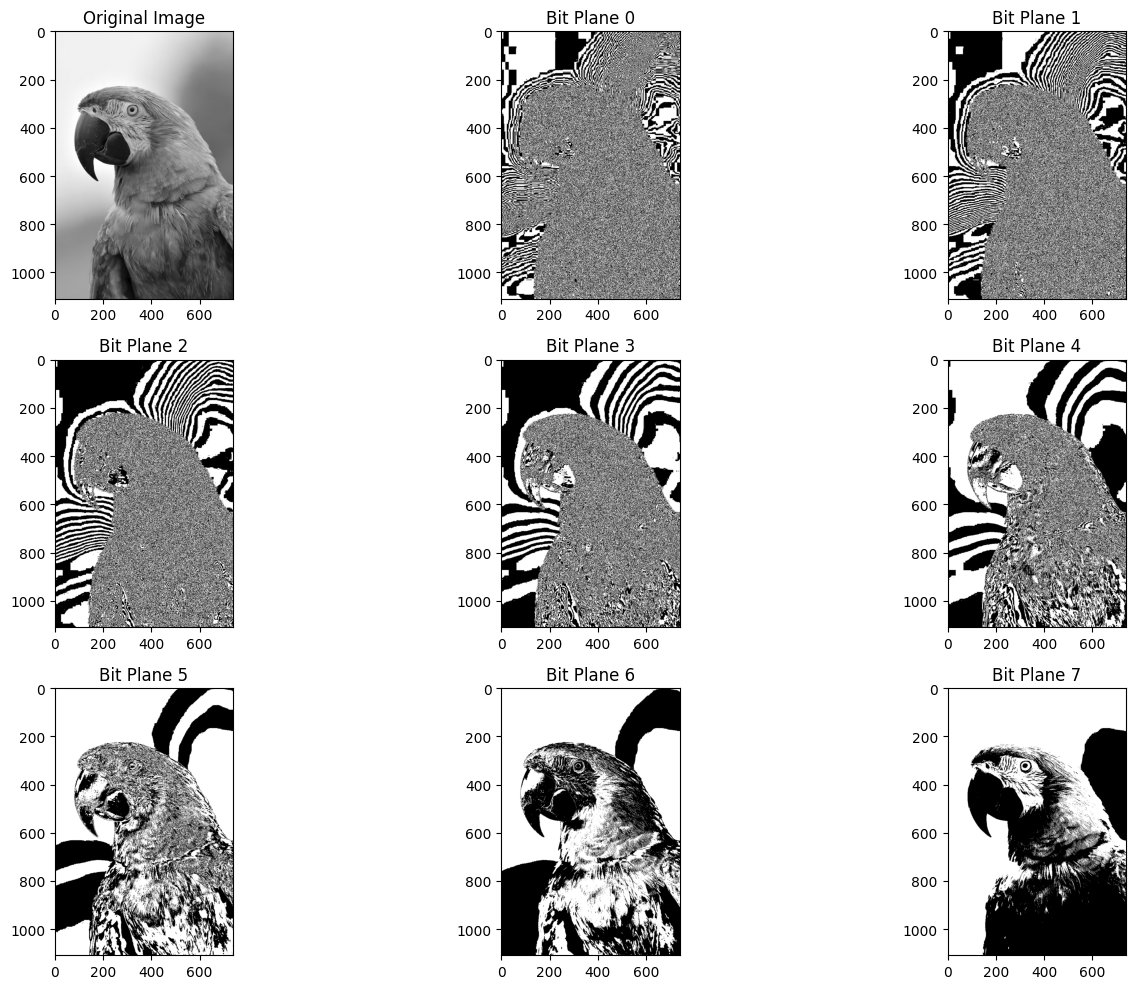

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# image_path = '/content/drive/MyDrive/IPCV/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg'

def bit_plane_slicing(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, 0)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Image not found at {image_path}. Please check the file path.")
        return

    # Display the original image
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 3, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')


    for i in range(8):
        # Extract the i-th bit plane
        # Shift the image right by i bits, then bitwise AND with 1
        # This isolates the i-th bit (0 or 1) for each pixel
        bit_plane = (img >> i) & 1

        # Scale the bit plane to 255 for visualization (0 becomes 0, 1 becomes 255)
        bit_plane_display = bit_plane * 255

        # Display the bit plane
        plt.subplot(3, 3, i + 2) # Start from the 2nd plot
        plt.title(f'Bit Plane {i}')
        plt.imshow(bit_plane_display, cmap='gray')

    plt.tight_layout() # Adjust layout to prevent overlapping titles
    plt.show()

# Example usage:
bit_plane_slicing(image_path)


4. Gray Level Slicing

Theory

Gray level slicing highlights a specific range of gray levels in an image. It can be performed
with or without suppressing the background.

There are two main approaches:
1.  **Without background suppression**: All pixels in the desired gray-level range are set to a high value (e.g., 255), while other pixels remain unchanged.
2.  **With background suppression**: All pixels in the desired gray-level range are set to a high value (e.g., 255), and all other pixels are set to a low value (e.g., 0, making the background black).

Applying Gray Level Slicing without background suppression:


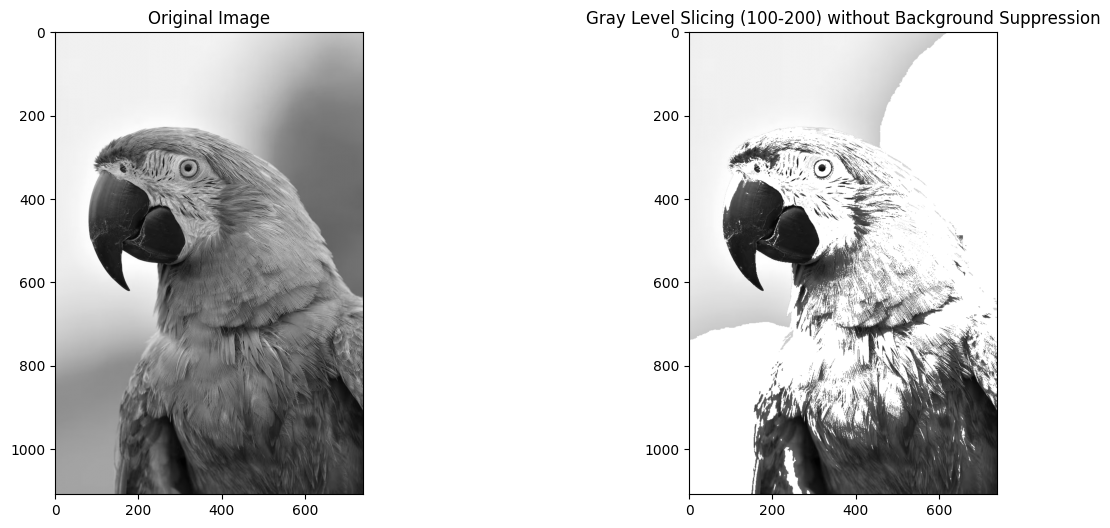


Applying Gray Level Slicing with background suppression:


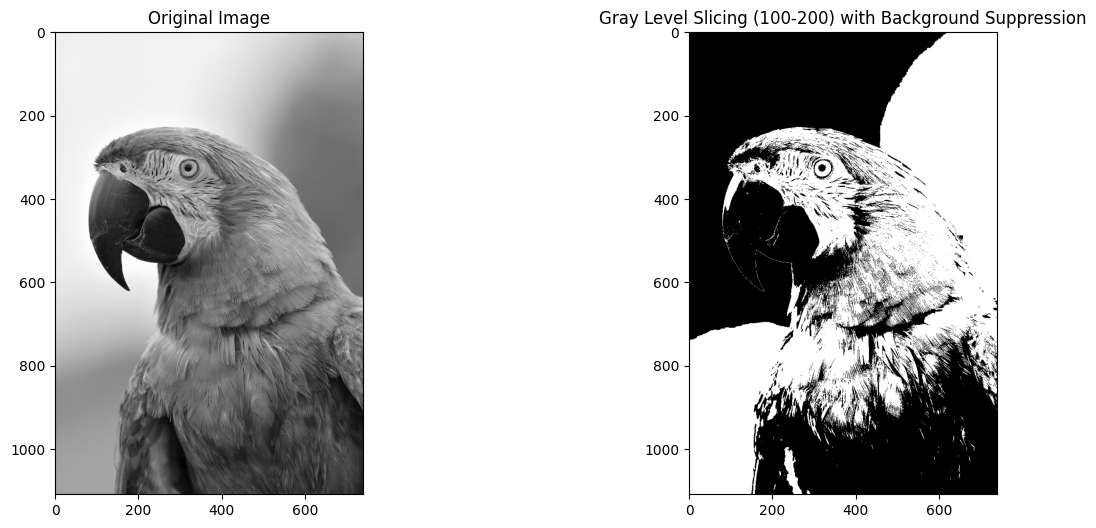

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure image_path is defined from previous cells, or define it here if running standalone
image_path = '/content/drive/MyDrive/IPCV/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg'

def gray_level_slicing(image_path, lower_bound, upper_bound, suppress_background=False):
    # Load the image in grayscale
    img = cv2.imread(image_path, 0)

    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Image not found at {image_path}. Please check the file path.")
        return

    # Create an output image of the same size and type as the original
    sliced_img = np.zeros_like(img)

    # Apply gray level slicing
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if lower_bound <= img[i, j] <= upper_bound:
                sliced_img[i, j] = 255  # Highlight the specified range
            elif not suppress_background:
                sliced_img[i, j] = img[i, j] # Keep original pixel if not suppressing background
            else:
                sliced_img[i, j] = 0  # Suppress background

    # Display the results
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    if suppress_background:
        plt.title(f'Gray Level Slicing ({lower_bound}-{upper_bound}) with Background Suppression')
    else:
        plt.title(f'Gray Level Slicing ({lower_bound}-{upper_bound}) without Background Suppression')
    plt.imshow(sliced_img, cmap='gray')

    plt.show()

# Example usage:
print("Applying Gray Level Slicing without background suppression:")
gray_level_slicing(image_path, lower_bound=100, upper_bound=200, suppress_background=False)

print("\nApplying Gray Level Slicing with background suppression:")
gray_level_slicing(image_path, lower_bound=100, upper_bound=200, suppress_background=True)
